In [1]:
import math as m
import sys
import numpy as np
from numpy import cos
from numpy import pi
np.set_printoptions(threshold=sys.maxsize)
from scipy import linalg as LA
from ipynb.fs.full.UCC import *
from ipynb.fs.full.HAM import *
import matplotlib.pyplot as plt

In [2]:
def groundstate(U): #get ground state
    tol = 0.4
    eigenvalues, eigenvectors = LA.eigh(hamm(U))
    eigenvalues = eigenvalues.real
    eigenvectors = eigenvectors.real

    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[idx]
    ground_state = eigenvectors[-1].real
    i = 1
    #while abs(ground_state[0]) < tol:
        #ground_state = eigenvectors[-i].real
        #i += 1
        
    #if U == 0:
        #ground_state = eigenvectors[-3]
    return ground_state

In [3]:
#create raw ucc lists
possibles = singles(1)
#ucc_matrix = np.zeros([36,36],dtype=np.int32)
print(possibles)
ucc_singles = np.zeros([len(possibles),len(basis),len(basis)])

possibled = double(1)
print(possibled)
ucc_doubles = np.zeros([len(possibled),len(basis),len(basis)])

[[-1, '13'], [-1, '25'], [1, '7'], [1, '19'], [-1, '3'], [-1, '5'], [1, '2'], [1, '4']]
[[-1, '15'], [-1, '17'], [-1, '27'], [-1, '29'], [1, '14'], [1, '16'], [1, '26'], [1, '28'], [1, '9'], [1, '11'], [1, '21'], [1, '23'], [-1, '8'], [-1, '10'], [-1, '20'], [-1, '22'], [-1, '6'], [-1, '31']]


In [4]:
poss = 0
posd = 0

for i in range(len(possibles)):
    poss = int(possibles[i][1])
    ucc_singles[i][0][poss-1] = int(possibles[i][0])
    ucc_singles[i] = ucc_singles[i] - ucc_singles[i].transpose()
    #ucc_singles[i] = ucc_singles[i] / LA.norm(ucc_singles[i])
        
for i in range(len(possibled)):
    posd = int(possibled[i][1])
    ucc_doubles[i][0][posd-1] = int(possibled[i][0])
    ucc_doubles[i] = ucc_doubles[i] - ucc_doubles[i].transpose()
    #ucc_doubles[i] = ucc_doubles[i] / LA.norm(ucc_doubles[i])
        
#whole_singles = np.zeros([len(basis), len(basis)])
#for i in range(len(possibles)):
    #whole_singles += ucc_singles[i]
#whole_singles = whole_singles / LA.norm(whole_singles)  

#whole_doubles = np.zeros([len(basis), len(basis)])
#for i in range(len(possibled)):
    #whole_doubles += ucc_doubles[i]
#whole_doubles = whole_doubles / LA.norm(whole_doubles)  

In [5]:
#CHECK
'''
for i in range(len(possibles)):
    print(i)
    print(ucc_singles[i])
    print('\n')
'''
'''
for i in range(len(possibled)):
    print(i)
    print(ucc_doubles[i])
    print('\n')
'''    
uccket = groundstate(0.001)
uccket = uccket / LA.norm(uccket)

In [7]:
def appsg(vector):
    exponent = np.zeros([len(basis),len(basis)],dtype=float)
    fexp = np.zeros([len(basis),len(basis)],dtype=float)
    exp_total = np.identity(len(basis),dtype=float)
    theta = list(vector)
    for i in range(len(theta)):
        exponent = theta[i] * ucc_singles[i]
        fexp = LA.expm(exponent)
        #fexp = np.nan_to_num(fexp)
        exp_total *= fexp
    return np.dot(exp_total, uccket)

def appdb(vector,ket):
    exponent = np.zeros([len(basis),len(basis)],dtype=float)
    theta = list(vector)
    for i in range(len(theta)):
        if theta[i] != 0:
            
            exponent += theta[i] * ucc_doubles[i]
    return np.dot(LA.expm(exponent), ket)
'''
def appsg(vector):
    exponent = np.identity(36,dtype=float)
    theta = list(vector)
    for i in range(len(theta)):
        exponent *= LA.expm(theta[i] * ucc_singles[i])
    return np.dot(exponent, uccket)

def appdb(vector,ket):
    exponent = np.identity(36,dtype=float)
    theta = list(vector)
    for i in range(len(theta)):
        exponent *= LA.expm(theta[i] * ucc_doubles[i])
    return np.dot(exponent, ket)
'''

'\ndef appsg(vector):\n    exponent = np.identity(36,dtype=float)\n    theta = list(vector)\n    for i in range(len(theta)):\n        exponent *= LA.expm(theta[i] * ucc_singles[i])\n    return np.dot(exponent, uccket)\n\ndef appdb(vector,ket):\n    exponent = np.identity(36,dtype=float)\n    theta = list(vector)\n    for i in range(len(theta)):\n        exponent *= LA.expm(theta[i] * ucc_doubles[i])\n    return np.dot(exponent, ket)\n'

In [26]:
u_start = 0.0
u_end = 1
nstep = 11
u_list = np.linspace(u_start, u_end, nstep)
gs_vector = []
for i in range(len(u_list)):
    #print(u_list[i])
    gs_vector.append(groundstate(u_list[i]))

In [27]:
stepsize = 0.01
anglelist = np.arange(0, 2*pi, stepsize)
def bestsg(U):
    #hamiltonian = hamm(U)
    
    energy = np.zeros([len(possibles), len(anglelist)])
    angles = np.zeros(len(possibles))
    overlap = np.zeros([len(possibles), len(anglelist)])
    for i in range(len(possibles)):
        if i != 6:
            for j in range(len(anglelist)):
                angles[i] = anglelist[j]
                overlap[i][j] = np.dot(gs_vector[U],appsg(angles)) ** 2
                #psi = np.dot(hamiltonian, appsg(angles))
                #energy[i][j] = np.dot(appsg(angles),psi)
        
        index = np.argmax(overlap[i])
        #e_index = np.argmin(energy[i])
        #print(np.amin(energy[i]))
        angles[i] = anglelist[index]
        #angles[i] = anglelist[e_index]
        #print(np.amax(energy[i]))
        #print(np.amax(overlap[i]))
        #print(overlap[i][e_index])
        #print(overlap[i][index])
    '''    
    angles_new = angles
    overlap_new = 0.0
    for i in range(len(possibles)):
        if i >= 1 and i < (len(possibles)-1):
            angles_new[i] = (angles[i-1] + angles[i+1]) / 2.0
        overlap_new = np.dot(gs_vector[U],appsg(angles_new)) ** 2
        #psi = np.dot(hamiltonian, appsg(angles))
        #energy[i][j] = np.dot(appsg(angles),psi)
        if overlap_new > np.amax(overlap[i]):
            angles[i] = angles_new[i]
            overlap[i] = overlap_new
    '''
    return angles, overlap, energy

def bestdb(U):
    #hamiltonian = hamm(U)
    ket = appsg(bestsg(U)[0])

    energy = np.zeros([len(possibled), len(anglelist)])
    angles = np.zeros(len(possibled))
    overlap = np.zeros([len(possibled), len(anglelist)])
    for i in range(len(possibled)):
        for j in range(len(anglelist)):
            angles[i] = anglelist[j]
            overlap[i][j] = np.dot(gs_vector[U],appdb(angles,ket)) ** 2
            #psi = np.dot(hamiltonian, appdb(angles))
            #energy[i][j] = np.dot(appdb(angles),psi)
        
        #e_index = np.argmin(energy[i])
        index = np.argmax(overlap[i])
        angles[i] = anglelist[index]
        #angles[i] = anglelist[e_index]
        #print(np.amax(overlap[i]))
    '''
    angles_new = angles
    overlap_new = 0.0
    for i in range(len(possibled)):
        if i >= 1 and i < (len(possibled)-1):
            angles_new[i] = (angles[i-1] + angles[i+1]) / 2.0
        overlap_new = np.dot(gs_vector[U],appdb(angles_new,ket)) ** 2
        #psi = np.dot(hamiltonian, appsg(angles))
        #energy[i][j] = np.dot(appsg(angles),psi)
        if overlap_new > np.amax(overlap[i]):
            angles[i] = angles_new[i]
            overlap[i] = overlap_new
    '''
    return angles, overlap, energy

In [28]:
'''
best_singles = np.zeros([nstep, len(possibles)])
singles_overlap = np.zeros(nstep)
singles_energy = np.zeros(nstep)
#singles_list = []
for i in range(nstep):
    print(i)
    best_singles[i] = bestsg(i)[0]
    singles_overlap[i] = np.amax(bestsg(i)[1])
    #singles_energy[i] = np.amin(bestsg(i)[2])
best_singles = best_singles.transpose()
best_singles = best_singles % np.pi
'''

'\nbest_singles = np.zeros([nstep, len(possibles)])\nsingles_overlap = np.zeros(nstep)\nsingles_energy = np.zeros(nstep)\n#singles_list = []\nfor i in range(nstep):\n    print(i)\n    best_singles[i] = bestsg(i)[0]\n    singles_overlap[i] = np.amax(bestsg(i)[1])\n    #singles_energy[i] = np.amin(bestsg(i)[2])\nbest_singles = best_singles.transpose()\nbest_singles = best_singles % np.pi\n'

In [29]:
'''
best_doubles = np.zeros([nstep+1, len(possibled)])
doubles_overlap = np.zeros(nstep+1)
doubles_energy = np.zeros(nstep+1)
#doubles_list = []
for i in range(nstep+1):
    print(i)
    #doubles_list = bestdb(i)
    best_doubles[i] = bestdb(i)[0]
    doubles_overlap[i] = np.amax(bestdb(i)[1])
    #doubles_energy[i] = np.amin(bestdb(i)[2])
best_doubles = best_doubles.transpose()
best_doubles = best_doubles % np.pi
'''

'\nbest_doubles = np.zeros([nstep+1, len(possibled)])\ndoubles_overlap = np.zeros(nstep+1)\ndoubles_energy = np.zeros(nstep+1)\n#doubles_list = []\nfor i in range(nstep+1):\n    print(i)\n    #doubles_list = bestdb(i)\n    best_doubles[i] = bestdb(i)[0]\n    doubles_overlap[i] = np.amax(bestdb(i)[1])\n    #doubles_energy[i] = np.amin(bestdb(i)[2])\nbest_doubles = best_doubles.transpose()\nbest_doubles = best_doubles % np.pi\n'

In [30]:
'''
for i in range(len(best_singles)):
    for j in range(len(u_list)):
        
        if (best_singles[i][j] > 2.7):
            best_singles[i][j] = abs(best_singles[i][j] - np.pi)
'''
'''
fig, ax1 = plt.subplots(figsize=(18, 10))
plt.yticks(np.arange(0,4,step=np.pi/8))
ax2 = ax1.twinx()
ax1.plot(u_list, best_singles[0], label = 'Singles 0')
ax1.plot(u_list, best_singles[1], label = 'Singles 1')
ax1.plot(u_list, best_singles[2], label = 'Singles 2')
ax1.plot(u_list, best_singles[3], label = 'Singles 3')
ax1.plot(u_list, best_singles[4], label = 'Singles 4')
ax1.plot(u_list, best_singles[5], label = 'Singles 5')
ax1.plot(u_list, best_singles[6], label = 'Singles 6')
ax1.plot(u_list, best_singles[7], label = 'Singles 7')
ax2.plot(u_list, singles_overlap, 'x')
#ax2.plot(u_list, singles_energy, 'x')
ax1.set_ylabel('Rz angles')
ax2.set_ylabel('Overlap squared')
ax1.set_xlabel('U')
plt.title('Singles angles/overlaps squared')
#plt.legend()
plt.show()
'''

"\nfig, ax1 = plt.subplots(figsize=(18, 10))\nplt.yticks(np.arange(0,4,step=np.pi/8))\nax2 = ax1.twinx()\nax1.plot(u_list, best_singles[0], label = 'Singles 0')\nax1.plot(u_list, best_singles[1], label = 'Singles 1')\nax1.plot(u_list, best_singles[2], label = 'Singles 2')\nax1.plot(u_list, best_singles[3], label = 'Singles 3')\nax1.plot(u_list, best_singles[4], label = 'Singles 4')\nax1.plot(u_list, best_singles[5], label = 'Singles 5')\nax1.plot(u_list, best_singles[6], label = 'Singles 6')\nax1.plot(u_list, best_singles[7], label = 'Singles 7')\nax2.plot(u_list, singles_overlap, 'x')\n#ax2.plot(u_list, singles_energy, 'x')\nax1.set_ylabel('Rz angles')\nax2.set_ylabel('Overlap squared')\nax1.set_xlabel('U')\nplt.title('Singles angles/overlaps squared')\n#plt.legend()\nplt.show()\n"

In [31]:
'''
plt.ylabel('Rz angles')
fig, ax1 = plt.subplots(figsize=(18, 10))
plt.yticks(np.arange(0,3*np.pi/2,step=np.pi/8))
ax2 = ax1.twinx()
ax1.plot(u_list, best_doubles[0], '.', label = 'Doubles 0')
ax1.plot(u_list, best_doubles[1], '.', label = 'Doubles 1')
ax1.plot(u_list, best_doubles[2], '.', label = 'Doubles 2')
ax1.plot(u_list, best_doubles[3], '.', label = 'Doubles 3')
ax1.plot(u_list, best_doubles[4], '.', label = 'Doubles 4')
ax1.plot(u_list, best_doubles[5], '.', label = 'Doubles 5')
ax1.plot(u_list, best_doubles[6], '.', label = 'Doubles 6')
ax1.plot(u_list, best_doubles[7], '.', label = 'Doubles 7')
ax1.plot(u_list, best_doubles[8], '.', label = 'Doubles 8')
ax1.plot(u_list, best_doubles[9], '.', label = 'Doubles 9')
ax1.plot(u_list, best_doubles[10], '.', label = 'Doubles 10')
ax1.plot(u_list, best_doubles[11], '.', label = 'Doubles 11')
ax1.plot(u_list, best_doubles[12], '.', label = 'Doubles 12')
ax1.plot(u_list, best_doubles[13], '.', label = 'Doubles 13')
ax1.plot(u_list, best_doubles[14], '.', label = 'Doubles 14')
ax1.plot(u_list, best_doubles[15], '.', label = 'Doubles 15')
ax1.plot(u_list, best_doubles[16], '.', label = 'Doubles 16')
ax1.plot(u_list, best_doubles[17], '.', label = 'Doubles 17')

ax2.plot(u_list, doubles_overlap, 'x')
ax1.set_xlabel('U')
ax1.set_ylabel('Rz angles')
ax2.set_ylabel('Overlaps squared')
plt.title('Doubles angles/overlaps squared')
plt.legend()
plt.show()
'''

"\nplt.ylabel('Rz angles')\nfig, ax1 = plt.subplots(figsize=(18, 10))\nplt.yticks(np.arange(0,3*np.pi/2,step=np.pi/8))\nax2 = ax1.twinx()\nax1.plot(u_list, best_doubles[0], '.', label = 'Doubles 0')\nax1.plot(u_list, best_doubles[1], '.', label = 'Doubles 1')\nax1.plot(u_list, best_doubles[2], '.', label = 'Doubles 2')\nax1.plot(u_list, best_doubles[3], '.', label = 'Doubles 3')\nax1.plot(u_list, best_doubles[4], '.', label = 'Doubles 4')\nax1.plot(u_list, best_doubles[5], '.', label = 'Doubles 5')\nax1.plot(u_list, best_doubles[6], '.', label = 'Doubles 6')\nax1.plot(u_list, best_doubles[7], '.', label = 'Doubles 7')\nax1.plot(u_list, best_doubles[8], '.', label = 'Doubles 8')\nax1.plot(u_list, best_doubles[9], '.', label = 'Doubles 9')\nax1.plot(u_list, best_doubles[10], '.', label = 'Doubles 10')\nax1.plot(u_list, best_doubles[11], '.', label = 'Doubles 11')\nax1.plot(u_list, best_doubles[12], '.', label = 'Doubles 12')\nax1.plot(u_list, best_doubles[13], '.', label = 'Doubles 13')\

In [32]:
just_singles = []
just_overlap = np.zeros([len(gs_vector), len(ucc_singles)])
#whole_anzats = np.dot(whole_singles, uccket)
for i in range(len(ucc_singles)):
    just_singles.append(np.dot(ucc_singles[i], uccket))

for i in range(len(gs_vector)):
    for j in range(len(just_singles)):
        just_overlap[i][j] = np.dot(gs_vector[i], just_singles[j]) ** 2
just_overlap = just_overlap.transpose()
#whole_overlap = np.zeros(len(gs_vector))
#for i in range(len(gs_vector)):
 #   print(i)
  #  whole_overlap[i] = np.dot(gs_vector[i], whole_anzats) ** 2

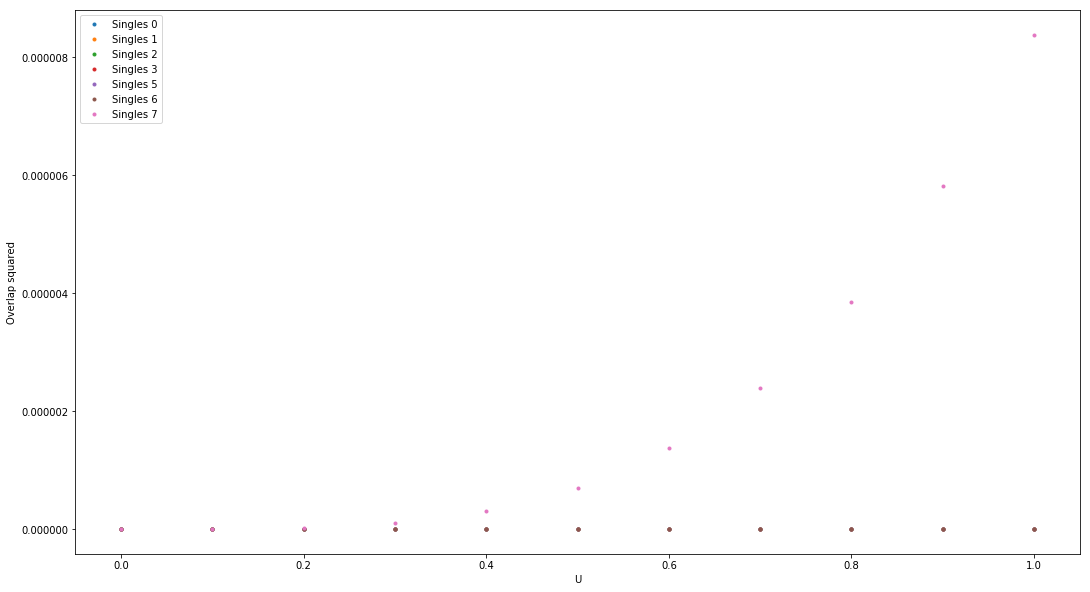

In [43]:
fig, ax1 = plt.subplots(figsize=(18, 10))
#plt.yticks(np.arange(0,np.pi,step=np.pi/8))
ax1.plot(u_list, just_overlap[0],'.', label = 'Singles 0')
ax1.plot(u_list, just_overlap[1],'.', label = 'Singles 1')
ax1.plot(u_list, just_overlap[2],'.', label = 'Singles 2')
ax1.plot(u_list, just_overlap[3],'.', label = 'Singles 3')
#ax1.plot(u_list, just_overlap[4],'.', label = 'Singles 4')
ax1.plot(u_list, just_overlap[5],'.', label = 'Singles 5')
ax1.plot(u_list, just_overlap[6],'.', label = 'Singles 6')
ax1.plot(u_list, just_overlap[7],'.', label = 'Singles 7')
#ax1.plot(u_list, whole_overlap, '.')
ax1.set_ylabel('Overlap squared')
ax1.set_xlabel('U')
#plt.ylim((-0.0001, 0.001))
plt.legend()
plt.show()

In [34]:
sqrt_overlap = np.sqrt(just_overlap)

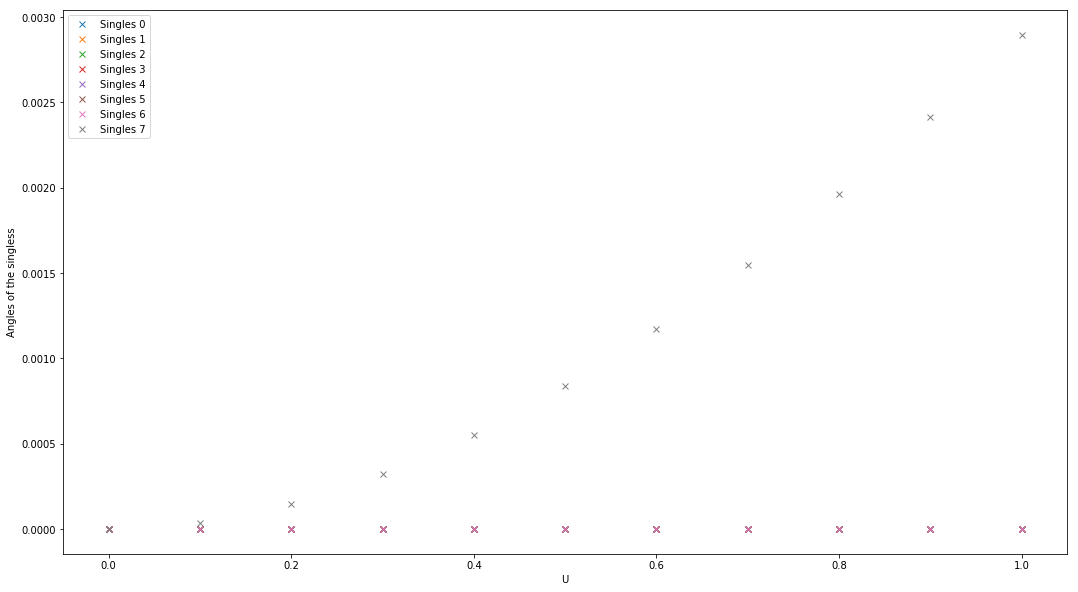

In [45]:
fig, ax1 = plt.subplots(figsize=(18, 10))
for i in range(len(sqrt_overlap)):
    ax1.plot(u_list, sqrt_overlap[i],'x', label = 'Singles ' + str(i))
ax1.set_ylabel('Angles of the singless')
ax1.set_xlabel('U')
#plt.ylim((-0.001, 0.02))
plt.legend()
plt.show()

In [44]:
sqrt_overlap[4] = 0
transpose_sqrt = sqrt_overlap.transpose()
psi_ucc_singles = np.zeros([len(u_list),len(basis)])

for i in range(len(u_list)):
    psi_ucc_singles[i] = appsg(transpose_sqrt[i])

In [46]:
psi_prime = gs_vector - psi_ucc_singles

In [47]:
doubles_antz = np.zeros([len(ucc_doubles), len(basis)])
for i in range(len(ucc_doubles)):
    doubles_antz[i] = np.dot(ucc_doubles[i], uccket)

In [48]:
doubles_angles = np.zeros([len(doubles_antz), len(psi_prime)])
for i in range(len(doubles_antz)):
    for j in range(len(psi_prime)):
        
        doubles_angles[i][j] = np.dot(doubles_antz[i], psi_prime[j])

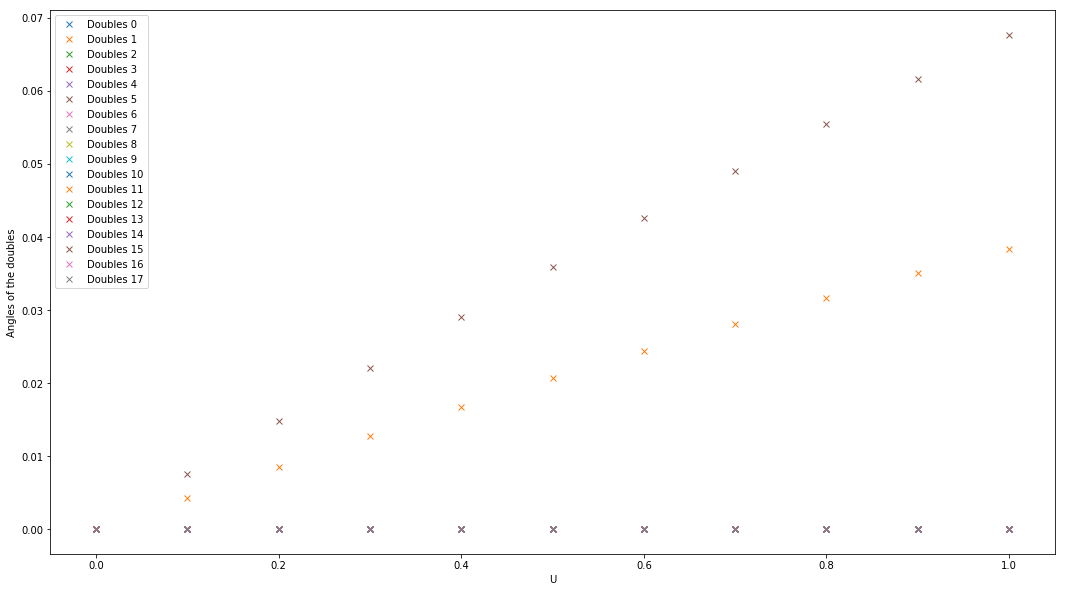

In [54]:
fig, ax1 = plt.subplots(figsize=(18, 10))
for i in range(len(doubles_angles)):
    ax1.plot(u_list, abs(doubles_angles[i]),'x', label = 'Doubles ' + str(i))
ax1.set_ylabel('Angles of the doubles')
ax1.set_xlabel('U')
#plt.ylim((-0.00001, 0.0001))
plt.legend()
plt.show()

In [50]:
doubles_angles

array([[ 0.00000000e+00, -3.53249156e-18, -8.08663465e-18,
         6.95970442e-18, -1.45001394e-18, -8.09854557e-18,
        -1.59118786e-17, -1.34616456e-17,  7.63939126e-18,
        -1.15200901e-17, -1.85923242e-17],
       [-4.48180761e-36,  3.11184712e-19,  2.89309922e-19,
         1.06445436e-18,  3.20850734e-19,  3.50538670e-19,
         3.11927003e-19,  2.47404427e-19,  3.06701729e-19,
         3.16521410e-19,  3.08306796e-19],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.93347884e-18, -5.95059855e-18,
         1.89877229e-17,  5.13324988e-18, -6.50414281e-18,
  